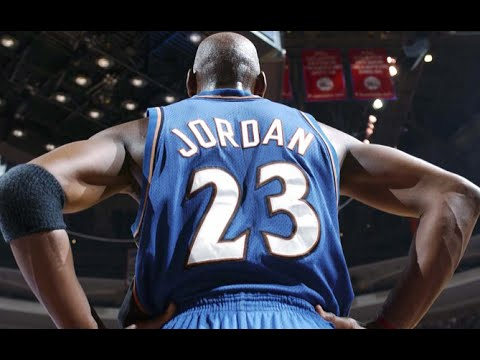

In [9]:
from IPython.display import display, Image
display(Image(filename='MJ.jpg', width = 9000))

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
import scipy.stats
from scipy.stats import norm
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
wiz1 = pd.read_csv('wizards1.csv',skiprows = 1)
wiz2 = pd.read_csv('wizards2.csv',skiprows = 1 )
wizards = [wiz1,wiz2] # created list
wizards = pd.concat(wizards) # list into DF
wizards.reset_index()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 40
wizards.head()

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566


In [3]:
wizards.shape

(182, 37)

# Clean Data

In [4]:
wizards['Blk'] = wizards['BLK']/ wizards['G']

In [98]:
wizards = wizards.sort_values(by='Rk', ascending=True)
wizards = wizards.drop(wizards.index[57])
wizards.head

<bound method NDFrame.head of      Rk              Player  From    To Position   Lg  TRB  AST  STL   PTS  \
0     1           John Wall  2011  2019       PG  NBA  4.3  9.2  1.7  19.0   
1     2      Gilbert Arenas  2004  2011       PG  NBA  4.2  5.7  1.8  25.0   
2     3        Bradley Beal  2013  2020       SG  NBA  4.0  4.0  1.1  21.0   
3     4      Antawn Jamison  2005  2010       PF  NBA  8.9  1.8  1.1  20.8   
4     5     Brendan Haywood  2002  2010        C  NBA  6.3  0.6  0.4   7.7   
5     6       Marcin Gortat  2014  2018        C  NBA  9.2  1.5  0.5  11.6   
6     7         Otto Porter  2014  2019       SF  NBA  5.0  1.4  1.2  10.7   
7     8        Caron Butler  2006  2010       SF  NBA  6.6  3.5  1.8  19.0   
8     9        Larry Hughes  2003  2005       SG  NBA  5.4  3.4  1.9  17.7   
9    10         Etan Thomas  2002  2009        C  NBA  4.9  0.4  0.3   6.0   
10   11     Antonio Daniels  2006  2009       PG  NBA  2.2  3.9  0.7   8.2   
11   12        Nenê Hilário  2012 

In [6]:
wizards.isnull().sum()

Rk           0
Player       0
From         0
To           0
Position     0
Lg           0
TRB          0
AST          0
STL          0
PTS          0
WS           0
G            0
GS           0
MP           0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
TRB.1        0
AST.1        0
STL.1        0
BLK          0
TOV          0
PF           0
PTS.1        0
FG%          1
2P%          4
3P%         24
eFG%         1
FT%         12
TS%          1
Blk          0
dtype: int64

In [7]:
wizards = wizards.fillna(0)

In [8]:
wizards.dtypes

Rk            int64
Player       object
From          int64
To            int64
Position     object
Lg           object
TRB         float64
AST         float64
STL         float64
PTS         float64
WS          float64
G             int64
GS            int64
MP            int64
FG            int64
FGA           int64
2P            int64
2PA           int64
3P            int64
3PA           int64
FT            int64
FTA           int64
ORB           int64
DRB           int64
TRB.1         int64
AST.1         int64
STL.1         int64
BLK           int64
TOV           int64
PF            int64
PTS.1         int64
FG%         float64
2P%         float64
3P%         float64
eFG%        float64
FT%         float64
TS%         float64
Blk         float64
dtype: object

In [9]:
wizards.isnull().sum()

Rk          0
Player      0
From        0
To          0
Position    0
Lg          0
TRB         0
AST         0
STL         0
PTS         0
WS          0
G           0
GS          0
MP          0
FG          0
FGA         0
2P          0
2PA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB.1       0
AST.1       0
STL.1       0
BLK         0
TOV         0
PF          0
PTS.1       0
FG%         0
2P%         0
3P%         0
eFG%        0
FT%         0
TS%         0
Blk         0
dtype: int64

# Position Distribution

In [10]:
# Make bar plot
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

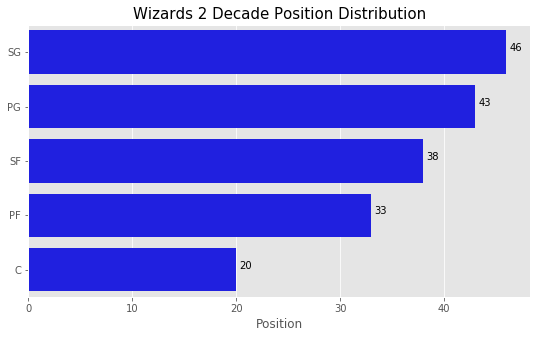

In [11]:
positions = bar_plot(wizards[
    'Position'].value_counts(), wizards[
    'Position'].value_counts().index, "Wizards 2 Decade Position Distribution",color ='b')

In [12]:
def get_position_averages(col):
    positions = PG, SG, SF, PF, C
    totals = []
    for position in positions:
        mean = position[col].mean()
        median = position[col].median()
        totals.append([mean, median])
    position_df = pd.DataFrame(totals, index=['PG', 'SG', 'SF', 'PF', 'C'])
    position_df.columns = ['mean_values','median_values']
    return position_df

In [13]:
features = ['G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']

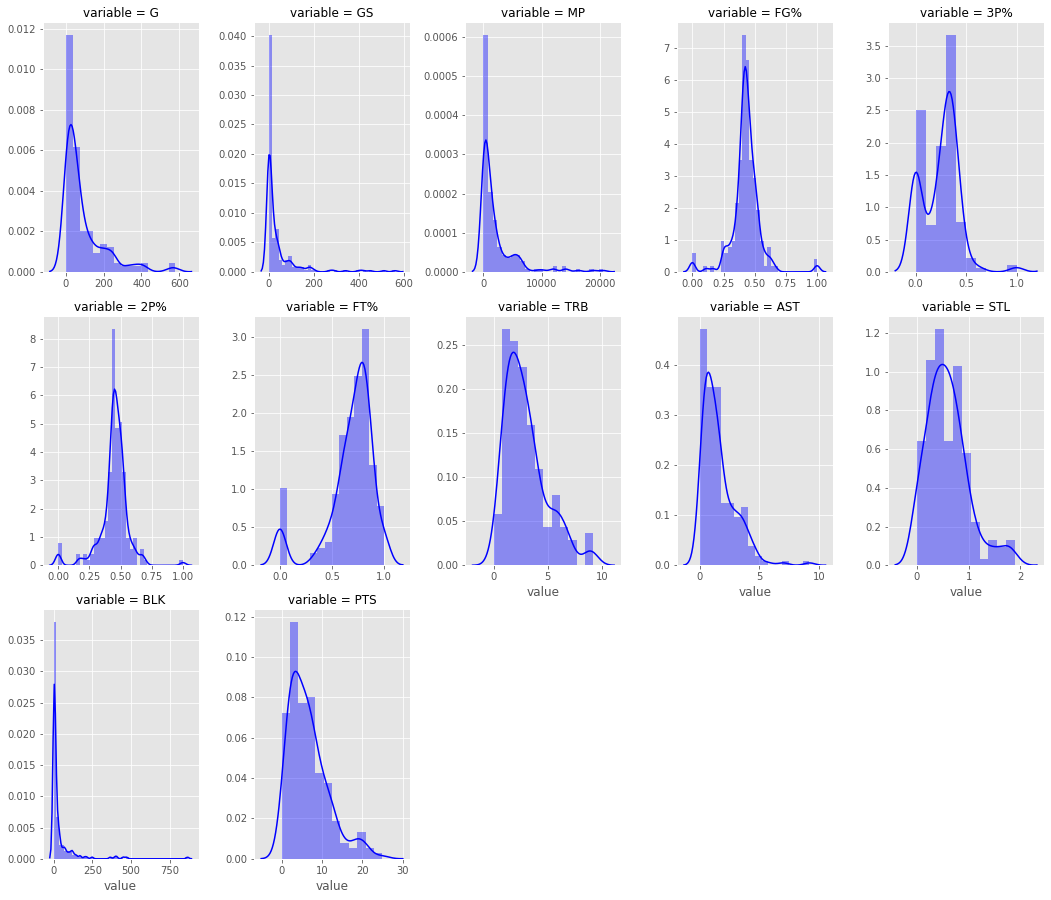

In [14]:
dfm = pd.melt(wizards, value_vars=features)
gf = sns.FacetGrid(dfm, col_wrap=5, col='variable', height = 4.2, aspect = 0.7 ,sharex=False, sharey=False)
gf = gf.map(sns.distplot, 'value', color='b');

# Central Tendancy per game and position

In [15]:
PG = wizards[wizards['Position']=='PG']
SG = wizards[wizards['Position']=='SG']
SF = wizards[wizards['Position']=='SF']
PF = wizards[wizards['Position']=='PF']
C = wizards[wizards['Position']=='C']


In [16]:
get_position_averages('PTS')

,mean_values,median_values
PG,6.972093,6.20
SG,6.265217,4.20
SF,6.602632,6.25
PF,7.124242,5.80
C,6.065000,6.00


In [17]:
get_position_averages('FG%')

,mean_values,median_values
PG,0.404070,0.4190
SG,0.387196,0.3975
SF,0.431184,0.4300
PF,0.466152,0.4650
C,0.518050,0.5050


In [18]:
get_position_averages('TRB')

,mean_values,median_values
PG,2.011628,1.90
SG,2.263043,1.85
SF,3.042105,3.10
PF,4.027273,3.90
C,4.780000,4.70


In [19]:
get_position_averages('STL')

,mean_values,median_values
PG,0.683721,0.6
SG,0.600000,0.5
SF,0.578947,0.6
PF,0.527273,0.6
C,0.485000,0.4


In [20]:
get_position_averages('BLK')

,mean_values,median_values
PG,17.906977,5.0
SG,17.826087,3.5
SF,29.342105,8.5
PF,39.090909,21.0
C,173.950000,90.0


In [21]:
get_position_averages('AST')

,mean_values,median_values
PG,2.909302,3.00
SG,1.423913,1.15
SF,1.142105,0.95
PF,1.054545,0.80
C,0.755000,0.55


In [22]:
get_position_averages('3P%')

,mean_values,median_values
PG,0.328302,0.3500
SG,0.264630,0.3075
SF,0.251079,0.2990
PF,0.188636,0.2280
C,0.122000,0.0000


In [23]:
get_position_averages('FT%')

,mean_values,median_values
PG,0.674209,0.7820
SG,0.686130,0.7385
SF,0.721079,0.7335
PF,0.686576,0.7620
C,0.596800,0.6065


In [24]:
# Small Forward highest average performance categories
SF_features = ['PTS', 'TRB']

# Center highest average performance categories
C_features = ['Blk', 'FG%', 'TRB']

# Power Forward highest average performance categories
PF_features = ['TRB','FG%', 'PTS']

# Shooting Guard highest average performance categories
SG_features = ['AST', 'PTS', 'STL']

# Point Guard highest average performance categories
PG_features = ['AST', 'PTS', 'STL']

# Modeling

In [25]:
def get_cluster_scores(X_scaled):
    scores = []
    for k in range(2,15):
        cl = KMeans(n_clusters=k, random_state=42)
        cl.fit(X_scaled)
        inertia = cl.inertia_
        sil = silhouette_score(X_scaled, cl.labels_)
        scores.append([k, inertia, sil])
    score_df = pd.DataFrame(scores)
    score_df.columns = ['k', 'inertia', 'silhouette']
    return score_df

In [26]:
def plot_cluster_scores():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).inertia)
    axes[0].set_title('Inertia over k')
    axes[1].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).silhouette);
    axes[1].set_title('Silhouette Score over k')

In [27]:
def get_centroids(cols, sort_by):   
    centroids = pd.DataFrame(
        ss.inverse_transform(kmeans.cluster_centers_),
        columns = cols)
    centroids['mean'] = centroids.mean(numeric_only=True, axis=1)
    centroids['median'] = centroids.median(numeric_only=True, axis=1)
    return centroids.sort_values(sort_by, ascending=False)

In [28]:
X = PF[PF_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [29]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,4.310217,0.343471
11,13,4.899918,0.349724
10,12,5.690080,0.366339
9,11,6.495499,0.369953
8,10,7.670117,0.347174
7,9,9.149384,0.340325
6,8,11.403223,0.326738
5,7,13.760957,0.345704
4,6,16.920848,0.319471
3,5,20.320422,0.363182


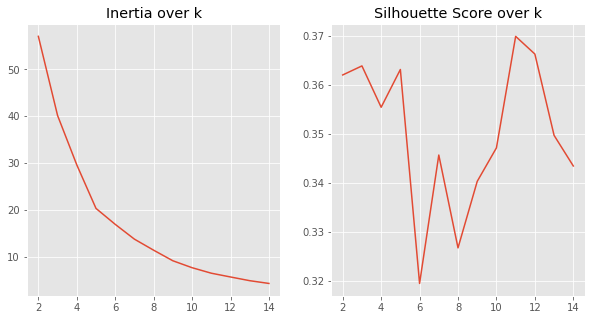

In [30]:
plot_cluster_scores()

In [31]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [32]:
cluster_nums = kmeans.labels_

In [33]:
PF = PF.copy()

PF.loc[:,'clusters'] = cluster_nums

In [34]:
PF_features

['TRB', 'FG%', 'PTS']

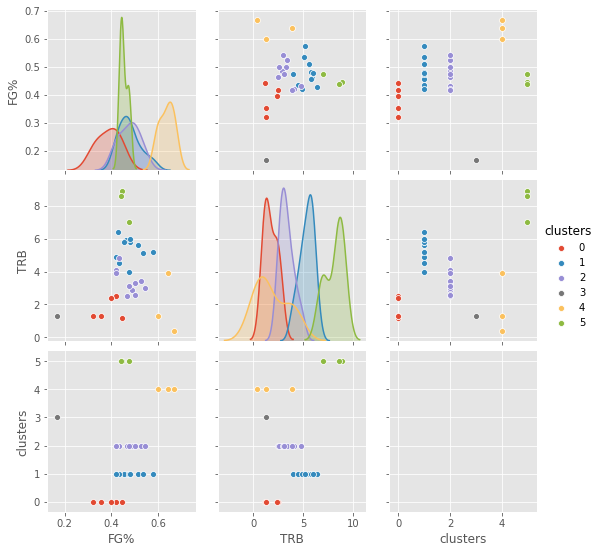

In [35]:
sns.pairplot(PF, vars=['FG%', 'TRB', 'clusters'], hue='clusters');


In [36]:
PF[['Player', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,PTS,clusters
3,Antawn Jamison,421,20.8,5
65,Juwan Howard,54,18.2,5
48,Dāvis Bertāns,54,15.4,1
92,Bobby Portis,28,14.3,5
75,Rui Hachimura,41,13.4,1
20,Markieff Morris,210,12.5,1
46,Jeff Green,77,12.3,1
11,Nenê Hilário,249,11.8,1
71,Rashard Lewis,60,9.7,1
73,Moritz Wagner,37,9.5,1


In [37]:
PF_centroids = get_centroids(PF_features, 'median')

In [38]:
PF_centroids

,TRB,FG%,PTS,mean,median
5,8.166667,0.453667,17.766667,8.795667,8.481167
1,5.381818,0.477364,10.209091,5.356091,5.368955
2,3.360000,0.476200,4.900000,2.912067,3.136033
0,1.740000,0.387000,2.880000,1.669000,1.704500
4,1.866667,0.635667,1.800000,1.434111,1.617056
3,1.300000,0.167000,0.700000,0.722333,0.711167


In [39]:
PF['ranking'] = PF['clusters'].map({5:1, 1:2, 2:3, 0:4, 4:5, 3:6,})



In [40]:
PF[['Player', 'G', 'PTS', 'ranking', 'From','To']].sort_values('ranking')

,Player,G,PTS,ranking,From,To
3,Antawn Jamison,421,20.8,1,2005,2010
92,Bobby Portis,28,14.3,1,2019,2019
65,Juwan Howard,54,18.2,1,2001,2001
75,Rui Hachimura,41,13.4,2,2020,2020
71,Rashard Lewis,60,9.7,2,2011,2012
48,Dāvis Bertāns,54,15.4,2,2020,2020
46,Jeff Green,77,12.3,2,2019,2019
40,Kris Humphries,92,7.5,2,2015,2016
73,Moritz Wagner,37,9.5,2,2020,2020
35,Popeye Jones,124,5.8,2,2001,2002


In [41]:
X = C[C_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [42]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,0.743847,0.226141
11,13,0.992571,0.271448
10,12,1.459170,0.273648
9,11,2.042366,0.267604
8,10,2.728940,0.294585
7,9,3.726761,0.291793
6,8,4.877377,0.264090
5,7,6.199333,0.278452
4,6,7.746541,0.303508
3,5,9.172166,0.346481


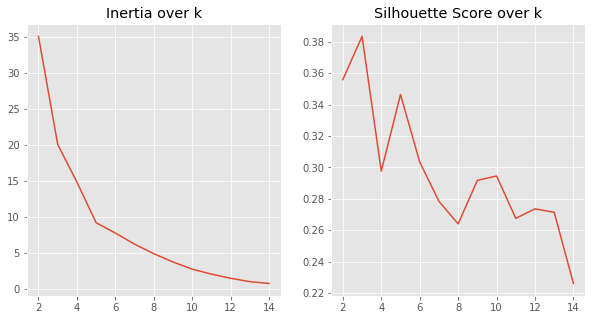

In [43]:
plot_cluster_scores()

In [44]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [45]:
cluster_nums = kmeans.labels_

In [46]:
C = C.copy()

C.loc[:,'clusters'] = cluster_nums

In [47]:
C_features

['Blk', 'FG%', 'TRB']

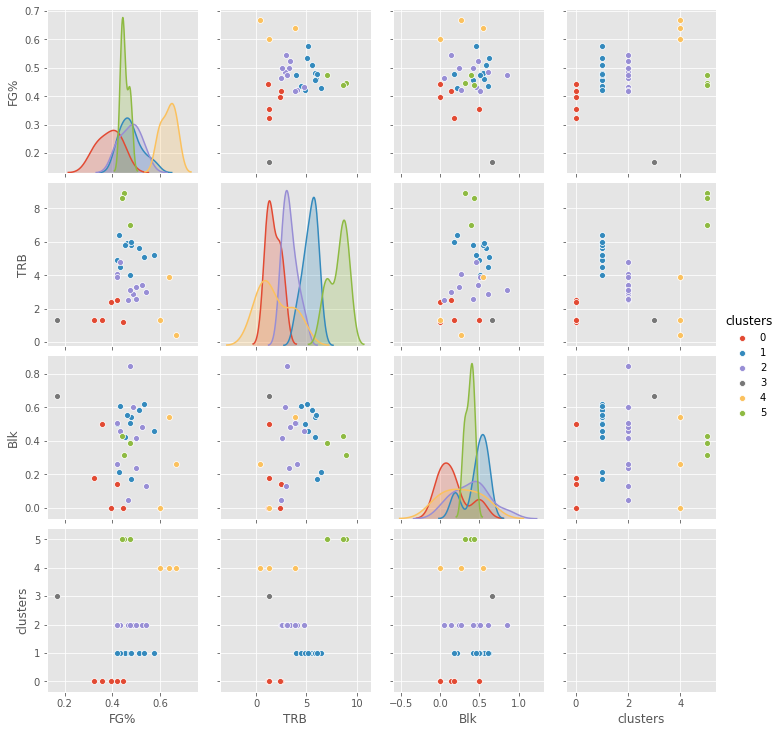

In [48]:
sns.pairplot(PF, vars=['FG%', 'TRB', 'Blk','clusters'], hue='clusters');


In [49]:
C[['Player','G','PTS','Blk','clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,PTS,Blk,clusters
99,Dwight Howard,9,12.8,0.444444,0
5,Marcin Gortat,402,11.6,1.116915,4
23,Thomas Bryant,110,11.1,0.909091,4
17,Andray Blatche,409,9.9,0.894866,2
41,Emeka Okafor,79,9.7,0.974684,4
15,JaVale McGee,255,8.5,1.843137,7
4,Brendan Haywood,579,7.7,1.493955,7
22,Kwame Brown,253,7.7,0.683794,2
31,Jahidi White,156,6.6,1.275641,4
9,Etan Thomas,373,6.0,1.091153,2


In [50]:
C_centroids = get_centroids(C_features, 'median') 

In [51]:
C_centroids # numbers not evenly distributed. 
            # Possible outlier 

,Blk,FG%,TRB,mean,median
7,1.668546,0.528500,6.150000,2.782349,2.225447
4,1.069083,0.537750,7.800000,3.135611,2.102347
0,0.444444,0.623000,9.200000,3.422481,2.022741
2,0.877381,0.479800,4.580000,1.979060,1.428221
3,0.750000,1.000000,3.000000,1.583333,1.291667
6,0.440892,0.474667,3.500000,1.471853,0.973260
1,0.077876,0.402333,2.166667,0.882292,0.642313
5,0.500000,0.500000,0.000000,0.333333,0.416667


In [52]:
C['ranking'] = C['clusters'].map({7:1, 4:2, 0:3, 2:4, 3:5, 6:6, 5:7, 1:8})

In [53]:
C[['Player', 'G', 'TRB','Blk','ranking', 'From','To']].sort_values('ranking')

,Player,G,TRB,Blk,ranking,From,To
4,Brendan Haywood,579,6.3,1.493955,1,2002,2010
15,JaVale McGee,255,6.0,1.843137,1,2009,2012
31,Jahidi White,156,6.7,1.275641,2,2001,2004
23,Thomas Bryant,110,6.5,0.909091,2,2019,2020
41,Emeka Okafor,79,8.8,0.974684,2,2013,2013
5,Marcin Gortat,402,9.2,1.116915,2,2014,2018
99,Dwight Howard,9,9.2,0.444444,3,2019,2019
22,Kwame Brown,253,5.5,0.683794,4,2002,2005
9,Etan Thomas,373,4.9,1.091153,4,2002,2009
30,Ian Mahinmi,180,4.5,0.700000,4,2017,2020


In [54]:
X = SF[SF_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [55]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,1.653065,0.384106
11,13,1.850896,0.381153
10,12,2.130028,0.405444
9,11,2.561460,0.395680
8,10,2.976217,0.380467
7,9,3.469131,0.406035
6,8,4.009014,0.429480
5,7,4.940862,0.488140
4,6,6.122930,0.483952
3,5,8.437073,0.440357


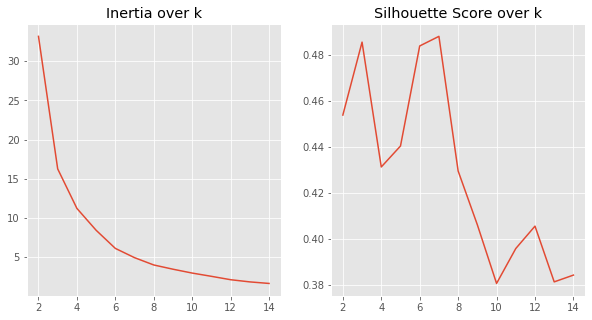

In [56]:
plot_cluster_scores()

In [57]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [58]:
cluster_nums = kmeans.labels_

In [59]:
SF = SF.copy()

SF.loc[:,'clusters'] = cluster_nums

In [60]:
SF_features

['PTS', 'TRB']

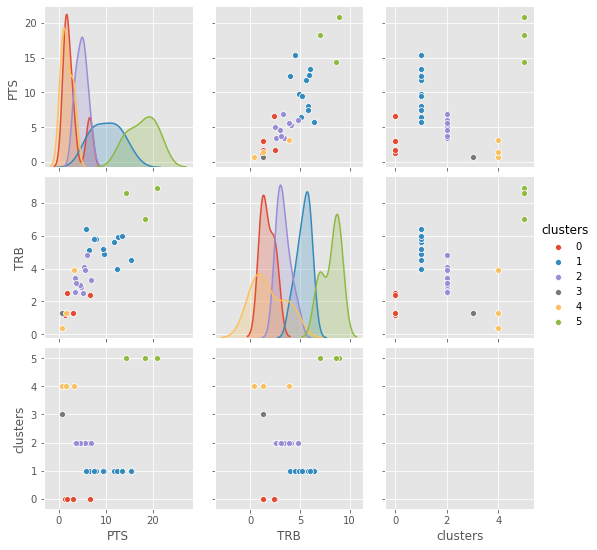

In [61]:
sns.pairplot(PF, vars=['PTS','TRB','clusters'], hue='clusters');


In [62]:
SF[['Player','G','TRB','PTS','clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,TRB,PTS,clusters
7,Caron Butler,310,6.6,19.0,5
91,Jabari Parker,25,7.2,15.0,5
13,Trevor Ariza,176,5.5,12.7,2
84,Bojan Bogdanović,26,3.1,12.7,7
36,Paul Pierce,73,4.0,11.9,7
44,Mike Miller,54,6.2,10.9,2
6,Otto Porter,384,5.0,10.7,2
54,Josh Howard,22,4.0,9.5,0
16,Martell Webster,186,3.0,9.3,0
68,Al Thornton,73,3.5,8.9,0


In [63]:
SF_centroids = get_centroids(SF_features, 'median') 

In [64]:
SF_centroids

,PTS,TRB,mean,median
5,17.000000,6.900000,11.950000,11.950000
2,11.433333,5.566667,8.500000,8.500000
7,12.300000,3.550000,7.925000,7.925000
0,8.685714,3.471429,6.078571,6.078571
6,7.175000,2.025000,4.600000,4.600000
3,4.925000,3.400000,4.162500,4.162500
1,3.550000,2.075000,2.812500,2.812500
4,1.862500,1.262500,1.562500,1.562500


In [65]:
SF['ranking'] = SF['clusters'].map({5:1, 2:2, 7:3, 0:4, 6:5, 3:6, 1:7, 4:8})

In [99]:
SF[['Player', 'G', 'TRB','PTS','ranking', 'From','To']].sort_values('ranking')
SF.head(10)

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
6,7,Otto Porter,2014,2019,SF,NBA,5.0,1.4,1.2,10.7,27.9,384,271,10255,1609,3329,1121,2107,488,1222,415,528,449,1457,1906,553,453,168,295,709,4121,0.483,0.532,0.399,0.557,0.786,0.579,0.437500,2,2
7,8,Caron Butler,2006,2010,SF,NBA,6.6,3.5,1.8,19.0,25.4,310,289,11934,2168,4783,1953,4101,215,682,1338,1535,540,1511,2051,1100,563,90,829,877,5889,0.453,0.476,0.315,0.476,0.872,0.539,0.290323,5,1
13,14,Trevor Ariza,2013,2019,SF,NBA,5.5,2.7,1.4,12.7,13.0,176,135,5659,785,1813,434,867,351,946,321,409,177,790,967,469,251,53,283,337,2242,0.433,0.501,0.371,0.530,0.785,0.562,0.301136,2,2
16,17,Martell Webster,2013,2015,SF,NBA,3.0,1.4,0.5,9.3,11.3,186,75,4709,559,1314,264,570,295,744,321,387,101,461,562,257,97,33,170,340,1734,0.425,0.463,0.397,0.538,0.829,0.584,0.177419,0,4
25,26,Kelly Oubre,2016,2019,SF,NBA,3.5,0.7,0.7,8.2,7.0,252,32,5262,726,1748,480,980,246,768,365,466,169,717,886,178,187,79,204,600,2063,0.415,0.490,0.320,0.486,0.783,0.528,0.313492,0,4
36,37,Paul Pierce,2015,2015,SF,NBA,4.0,2.0,0.6,11.9,5.5,73,73,1914,293,656,175,353,118,303,164,210,45,249,294,144,46,24,92,160,868,0.447,0.496,0.389,0.537,0.781,0.580,0.328767,7,3
38,39,Kevin Séraphin,2011,2015,SF,NBA,3.7,0.5,0.2,6.4,5.1,326,31,5345,941,1915,941,1912,0,3,215,302,430,764,1194,176,73,248,377,770,2097,0.491,0.492,0.000,0.491,0.712,0.512,0.760736,3,6
39,40,Jared Dudley,2016,2016,SF,NBA,3.5,2.1,0.9,7.9,4.6,81,41,2098,233,487,133,249,100,238,72,98,54,232,286,170,75,18,80,190,638,0.478,0.534,0.420,0.581,0.735,0.602,0.222222,0,4
42,43,Jarvis Hayes,2004,2007,SF,NBA,3.4,1.3,0.8,8.9,4.4,226,94,5746,785,1954,620,1470,165,484,272,330,173,604,777,303,184,34,250,462,2007,0.402,0.422,0.341,0.444,0.824,0.478,0.150442,0,4
44,45,Mike Miller,2010,2010,SF,NBA,6.2,3.9,0.7,10.9,3.9,54,50,1805,217,433,135,262,82,171,70,85,55,281,336,212,39,12,115,131,586,0.501,0.515,0.480,0.596,0.824,0.623,0.222222,2,2


In [67]:
X = SG[SG_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [68]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,6.506937,0.304808
11,13,7.218580,0.301925
10,12,8.046132,0.316208
9,11,8.914070,0.337043
8,10,10.016055,0.349244
7,9,12.726097,0.336079
6,8,15.323175,0.355438
5,7,18.408369,0.306938
4,6,21.014527,0.347493
3,5,25.479865,0.307046


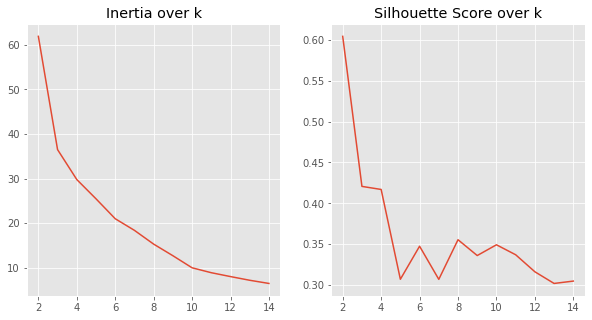

In [69]:
plot_cluster_scores()

In [70]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [71]:
cluster_nums = kmeans.labels_

In [72]:
SG = SG.copy()

SG.loc[:,'clusters'] = cluster_nums

In [73]:
SG_features

['AST', 'PTS', 'STL']

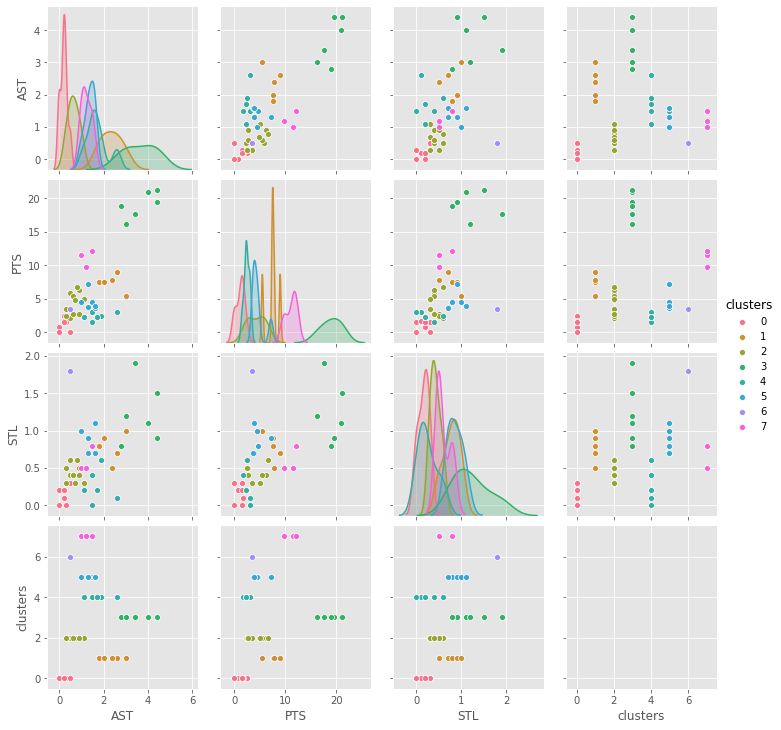

In [74]:
sns.pairplot(SG, vars=['AST','PTS','STL','clusters'], hue='clusters');


In [75]:
SG[['Player','G','STL','PTS','AST','clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,STL,PTS,AST,clusters
19,Michael Jordan,142,1.5,21.2,4.4,3
2,Bradley Beal,545,1.1,21.0,4.0,3
26,Jerry Stackhouse,96,0.9,19.5,4.4,3
28,Richard Hamilton,141,0.8,18.9,2.8,3
8,Larry Hughes,189,1.9,17.7,3.4,3
78,Mitch Richmond,37,1.2,16.2,3.0,3
51,Courtney Alexander,83,0.8,12.1,1.5,7
24,Nick Young,335,0.5,11.6,1.0,7
83,Gary Neal,40,0.5,9.8,1.2,7
29,DeShawn Stevenson,236,0.7,9.0,2.6,1


In [76]:
SG_centroids = get_centroids(SG_features, 'median') 

In [77]:
SG_centroids

,AST,PTS,STL,mean,median
3,3.666667,19.083333,1.233333,7.994444,5.830556
1,2.360000,7.460000,0.780000,3.533333,2.946667
7,1.233333,11.166667,0.600000,4.333333,2.783333
6,0.500000,3.500000,1.800000,1.933333,1.866667
5,1.383333,4.616667,0.866667,2.288889,1.836111
4,1.716667,2.450000,0.250000,1.472222,1.594444
2,0.654545,4.327273,0.427273,1.803030,1.228788
0,0.212500,1.175000,0.162500,0.516667,0.364583


In [78]:
SG['ranking'] = SG['clusters'].map({3:1, 1:2, 7:3, 6:4, 5:5, 4:6, 2:7, 0:8})

In [100]:
SG[['Player', 'G', 'AST','PTS','STL','ranking', 'From','To']].sort_values('ranking')
SG.head(10)

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559,0.392661,3,1
8,9,Larry Hughes,2003,2005,SG,NBA,5.4,3.4,1.9,17.7,15.2,189,178,6556,1214,2836,1047,2316,167,520,755,974,237,779,1016,638,357,68,441,464,3350,0.428,0.452,0.321,0.458,0.775,0.513,0.359788,3,1
19,20,Michael Jordan,2002,2003,SG,NBA,5.9,4.4,1.5,21.2,9.5,142,120,5124,1230,2851,1204,2743,26,108,529,657,121,715,836,621,208,65,335,290,3015,0.431,0.439,0.241,0.436,0.805,0.480,0.457746,3,1
24,25,Nick Young,2008,2012,SG,NBA,1.9,1.0,0.5,11.6,7.2,335,102,7661,1431,3318,1088,2416,343,902,667,805,120,518,638,327,177,63,391,651,3872,0.431,0.450,0.380,0.483,0.829,0.527,0.188060,7,3
26,27,Jerry Stackhouse,2003,2004,SG,NBA,3.7,4.4,0.9,19.5,6.7,96,87,3521,619,1522,525,1212,94,310,538,621,77,275,352,419,89,31,281,179,1870,0.407,0.433,0.303,0.438,0.866,0.521,0.322917,3,1
28,29,Richard Hamilton,2001,2002,SG,NBA,3.2,2.8,0.8,18.9,6.4,141,99,4722,1019,2333,963,2145,56,188,577,656,148,306,454,395,113,24,333,339,2671,0.437,0.449,0.298,0.449,0.880,0.509,0.170213,3,1
29,30,DeShawn Stevenson,2007,2010,SG,NBA,2.5,2.6,0.7,9.0,6.2,236,202,6485,749,1867,471,1080,278,787,359,498,110,482,592,612,162,41,277,359,2135,0.401,0.436,0.353,0.476,0.721,0.512,0.173729,1,2
34,35,Garrett Temple,2013,2016,SG,NBA,1.9,1.5,0.8,4.6,5.7,258,97,4480,425,1074,271,619,154,455,182,253,110,383,493,383,196,55,201,437,1186,0.396,0.438,0.338,0.467,0.719,0.500,0.213178,5,5
47,48,Michael Smith,2001,2001,SG,NBA,7.1,1.3,0.7,3.8,3.6,79,29,1610,106,218,106,217,0,1,89,154,172,390,562,101,57,37,62,156,301,0.486,0.488,0.000,0.486,0.578,0.527,0.468354,5,5
50,51,Tyrone Nesby,2001,2002,SG,NBA,3.8,1.3,0.9,7.2,3.2,118,31,2721,332,828,280,647,52,181,131,176,140,309,449,156,102,38,104,291,847,0.401,0.433,0.287,0.432,0.744,0.468,0.322034,5,5


In [80]:
X = PG[PG_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [81]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,7.591629,0.239500
11,13,8.539690,0.268870
10,12,9.517781,0.265557
9,11,10.741885,0.304581
8,10,12.600950,0.286063
7,9,14.130022,0.312124
6,8,16.021721,0.326960
5,7,18.920237,0.337595
4,6,23.365415,0.310121
3,5,28.473857,0.318322


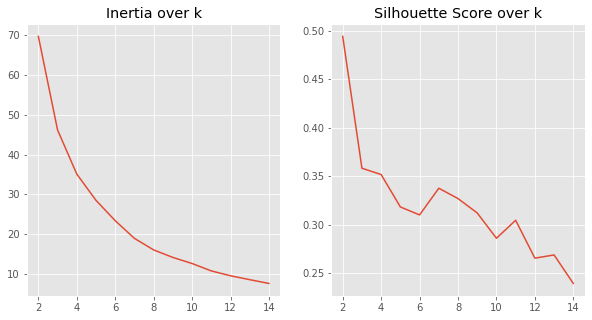

In [82]:
plot_cluster_scores()

In [83]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [84]:
cluster_nums = kmeans.labels_

In [85]:
PG = PG.copy()

PG.loc[:,'clusters'] = cluster_nums

In [86]:
PG_features

['AST', 'PTS', 'STL']

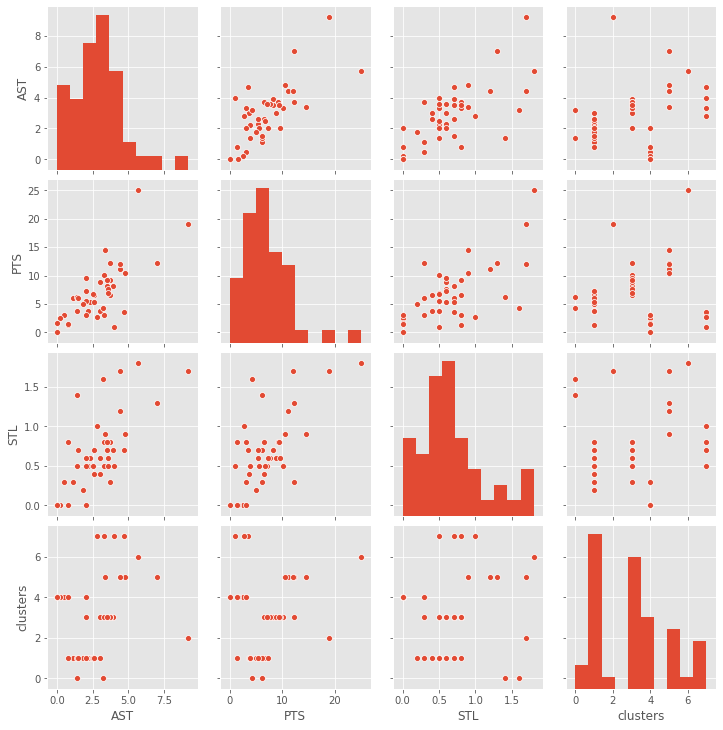

In [87]:
sns.pairplot(PG, vars=['AST','PTS','STL','clusters'])

In [88]:
PG[['Player','G','STL','PTS','AST','clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,STL,PTS,AST,clusters
1,Gilbert Arenas,357,1.8,25.0,5.7,6
0,John Wall,573,1.7,19.0,9.2,2
63,Jordan Crawford,133,0.9,14.5,3.4,5
60,Isaiah Thomas,40,0.3,12.2,3.7,3
72,Rod Strickland,33,1.3,12.2,7.0,5
2,Shabazz Napier,15,1.7,12.0,4.4,5
61,Kirk Hinrich,48,1.2,11.1,4.4,5
76,Ish Smith,60,0.9,10.5,4.8,5
64,Randy Foye,70,0.5,10.1,3.3,3
87,Jordan McRae,56,0.6,9.5,2.0,3


In [89]:
PG_centroids = get_centroids(PG_features, 'median')

In [90]:
PG_centroids

,AST,PTS,STL,mean,median
2,9.200000,19.000000,1.700000,9.966667,9.583333
6,5.700000,25.000000,1.800000,10.833333,8.266667
5,4.800000,12.060000,1.200000,6.020000,5.410000
3,3.409091,8.800000,0.627273,4.278788,3.843939
0,2.300000,5.250000,1.500000,3.016667,2.658333
7,3.700000,2.550000,0.750000,2.333333,2.441667
1,1.984615,5.107692,0.515385,2.535897,2.260256
4,0.583333,1.933333,0.050000,0.855556,0.719444


In [91]:
PG['ranking'] = PG['clusters'].map({2:1, 6:2, 5:3, 3:4, 0:5, 7:6, 1:7, 4:8})

In [101]:
PG[['Player', 'G', 'AST','PTS','STL','ranking', 'From','To']].sort_values('ranking')
PG.head()

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519,0.691099,2,1
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553,0.268908,6,2
10,11,Antonio Daniels,2006,2009,PG,NBA,2.2,3.9,0.7,8.2,14.3,244,93,6493,625,1431,561,1182,64,249,687,838,60,488,548,961,167,19,262,267,2001,0.437,0.475,0.257,0.459,0.820,0.556,0.077869,3,4
18,19,Tomáš Satoranský,2017,2019,PG,NBA,2.8,3.7,0.8,6.6,10.3,210,87,4526,519,1061,399,761,120,300,229,289,179,416,595,777,160,34,241,363,1387,0.489,0.524,0.400,0.546,0.792,0.584,0.161905,3,4
21,22,Chris Whitney,2001,2004,PG,NBA,1.7,3.7,0.8,9.2,9.0,157,117,3889,473,1171,241,582,232,589,260,293,26,247,273,576,133,11,194,338,1438,0.404,0.414,0.394,0.503,0.887,0.553,0.070064,3,4


In [93]:
#Merge DataFrames that show clusters and rankings
wizards_all = pd.concat([PG, SG, SF, PF, C])

# View shape
wizards_all.shape

# Inspect head
wizards_all.sort_values('Rk').head(10)

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519,0.691099,2,1
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553,0.268908,6,2
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559,0.392661,3,1
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529,0.313539,5,1
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566,1.493955,7,1
5,6,Marcin Gortat,2014,2018,C,NBA,9.2,1.5,0.5,11.6,35.6,402,400,11995,2007,3613,2006,3606,1,7,639,933,1023,2674,3697,613,217,449,565,973,4654,0.555,0.556,0.143,0.556,0.685,0.578,1.116915,4,2
6,7,Otto Porter,2014,2019,SF,NBA,5.0,1.4,1.2,10.7,27.9,384,271,10255,1609,3329,1121,2107,488,1222,415,528,449,1457,1906,553,453,168,295,709,4121,0.483,0.532,0.399,0.557,0.786,0.579,0.437500,2,2
7,8,Caron Butler,2006,2010,SF,NBA,6.6,3.5,1.8,19.0,25.4,310,289,11934,2168,4783,1953,4101,215,682,1338,1535,540,1511,2051,1100,563,90,829,877,5889,0.453,0.476,0.315,0.476,0.872,0.539,0.290323,5,1
8,9,Larry Hughes,2003,2005,SG,NBA,5.4,3.4,1.9,17.7,15.2,189,178,6556,1214,2836,1047,2316,167,520,755,974,237,779,1016,638,357,68,441,464,3350,0.428,0.452,0.321,0.458,0.775,0.513,0.359788,3,1
9,10,Etan Thomas,2002,2009,C,NBA,4.9,0.4,0.3,6.0,14.5,373,73,6681,849,1645,849,1645,0,0,536,893,653,1187,1840,146,123,407,362,839,2234,0.516,0.516,0.000,0.516,0.600,0.548,1.091153,2,4


In [94]:
def get_team_info(Rk):
    # Create cluster DataFrame
    team = wizards_all[wizards_all['ranking'] == Rk]

    # How many players in the cluster
    print(f'There are {len(team.index)} players in Team {Rk}')

    # Number of players in each position
    print(team.Position.value_counts())
    return team

In [95]:
team_1 = get_team_info(1)
team_1 = team_1.sort_values('Rk', ascending=True)
team_1

There are 14 players in Team 1
SG    6
PF    3
C     2
SF    2
PG    1
Name: Position, dtype: int64


,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519,0.691099,2,1
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559,0.392661,3,1
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529,0.313539,5,1
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566,1.493955,7,1
7,8,Caron Butler,2006,2010,SF,NBA,6.6,3.5,1.8,19.0,25.4,310,289,11934,2168,4783,1953,4101,215,682,1338,1535,540,1511,2051,1100,563,90,829,877,5889,0.453,0.476,0.315,0.476,0.872,0.539,0.290323,5,1
8,9,Larry Hughes,2003,2005,SG,NBA,5.4,3.4,1.9,17.7,15.2,189,178,6556,1214,2836,1047,2316,167,520,755,974,237,779,1016,638,357,68,441,464,3350,0.428,0.452,0.321,0.458,0.775,0.513,0.359788,3,1
15,16,JaVale McGee,2009,2012,C,NBA,6.0,0.4,0.5,8.5,12.2,255,148,5428,893,1698,893,1694,0,4,373,624,558,975,1533,100,115,470,282,627,2159,0.526,0.527,0.000,0.526,0.598,0.547,1.843137,7,1
19,20,Michael Jordan,2002,2003,SG,NBA,5.9,4.4,1.5,21.2,9.5,142,120,5124,1230,2851,1204,2743,26,108,529,657,121,715,836,621,208,65,335,290,3015,0.431,0.439,0.241,0.436,0.805,0.480,0.457746,3,1
26,27,Jerry Stackhouse,2003,2004,SG,NBA,3.7,4.4,0.9,19.5,6.7,96,87,3521,619,1522,525,1212,94,310,538,621,77,275,352,419,89,31,281,179,1870,0.407,0.433,0.303,0.438,0.866,0.521,0.322917,3,1
28,29,Richard Hamilton,2001,2002,SG,NBA,3.2,2.8,0.8,18.9,6.4,141,99,4722,1019,2333,963,2145,56,188,577,656,148,306,454,395,113,24,333,339,2671,0.437,0.449,0.298,0.449,0.880,0.509,0.170213,3,1


In [96]:
team_2 = get_team_info(2)
team_2.sort_values('Rk', ascending=True)


There are 24 players in Team 2
PF    11
SG     5
C      4
SF     3
PG     1
Name: Position, dtype: int64


,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553,0.268908,6,2
5,6,Marcin Gortat,2014,2018,C,NBA,9.2,1.5,0.5,11.6,35.6,402,400,11995,2007,3613,2006,3606,1,7,639,933,1023,2674,3697,613,217,449,565,973,4654,0.555,0.556,0.143,0.556,0.685,0.578,1.116915,4,2
6,7,Otto Porter,2014,2019,SF,NBA,5.0,1.4,1.2,10.7,27.9,384,271,10255,1609,3329,1121,2107,488,1222,415,528,449,1457,1906,553,453,168,295,709,4121,0.483,0.532,0.399,0.557,0.786,0.579,0.437500,2,2
11,12,Nenê Hilário,2012,2016,PF,NBA,5.6,2.3,1.0,11.8,14.1,249,161,6290,1168,2285,1166,2269,2,16,603,957,322,1066,1388,569,245,145,475,697,2941,0.511,0.514,0.125,0.512,0.630,0.543,0.582329,1,2
12,13,Christian Laettner,2001,2004,PF,NBA,5.8,2.6,1.0,8.0,13.2,206,145,5373,654,1362,641,1305,13,57,329,392,281,907,1188,532,210,112,281,520,1650,0.480,0.491,0.228,0.485,0.839,0.538,0.543689,1,2
13,14,Trevor Ariza,2013,2019,SF,NBA,5.5,2.7,1.4,12.7,13.0,176,135,5659,785,1813,434,867,351,946,321,409,177,790,967,469,251,53,283,337,2242,0.433,0.501,0.371,0.530,0.785,0.562,0.301136,2,2
14,15,Trevor Booker,2011,2014,PF,NBA,5.1,0.8,0.6,6.4,12.2,235,105,4764,650,1217,649,1207,1,10,211,342,464,730,1194,179,150,146,185,479,1512,0.534,0.538,0.100,0.535,0.617,0.553,0.621277,1,2
20,21,Markieff Morris,2016,2019,PF,NBA,5.9,1.7,0.9,12.5,9.4,210,185,5937,1013,2191,793,1565,220,626,384,471,253,981,1234,365,188,117,348,667,2630,0.462,0.507,0.351,0.513,0.815,0.548,0.557143,1,2
23,24,Thomas Bryant,2019,2020,C,NBA,6.5,1.5,0.4,11.1,8.4,110,81,2397,493,809,438,656,55,153,177,232,188,526,714,163,39,100,108,211,1218,0.609,0.668,0.359,0.643,0.763,0.668,0.909091,4,2
29,30,DeShawn Stevenson,2007,2010,SG,NBA,2.5,2.6,0.7,9.0,6.2,236,202,6485,749,1867,471,1080,278,787,359,498,110,482,592,612,162,41,277,359,2135,0.401,0.436,0.353,0.476,0.721,0.512,0.173729,1,2


In [104]:
allstar = [team_1,team_2] # created list
allstar = pd.concat(allstar) # list into DF
allstar.reset_index()
allstar.sort_values('Rk', ascending=True).head(15)

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk,clusters,ranking
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519,0.691099,2,1
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553,0.268908,6,2
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559,0.392661,3,1
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529,0.313539,5,1
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566,1.493955,7,1
5,6,Marcin Gortat,2014,2018,C,NBA,9.2,1.5,0.5,11.6,35.6,402,400,11995,2007,3613,2006,3606,1,7,639,933,1023,2674,3697,613,217,449,565,973,4654,0.555,0.556,0.143,0.556,0.685,0.578,1.116915,4,2
6,7,Otto Porter,2014,2019,SF,NBA,5.0,1.4,1.2,10.7,27.9,384,271,10255,1609,3329,1121,2107,488,1222,415,528,449,1457,1906,553,453,168,295,709,4121,0.483,0.532,0.399,0.557,0.786,0.579,0.437500,2,2
7,8,Caron Butler,2006,2010,SF,NBA,6.6,3.5,1.8,19.0,25.4,310,289,11934,2168,4783,1953,4101,215,682,1338,1535,540,1511,2051,1100,563,90,829,877,5889,0.453,0.476,0.315,0.476,0.872,0.539,0.290323,5,1
8,9,Larry Hughes,2003,2005,SG,NBA,5.4,3.4,1.9,17.7,15.2,189,178,6556,1214,2836,1047,2316,167,520,755,974,237,779,1016,638,357,68,441,464,3350,0.428,0.452,0.321,0.458,0.775,0.513,0.359788,3,1
11,12,Nenê Hilário,2012,2016,PF,NBA,5.6,2.3,1.0,11.8,14.1,249,161,6290,1168,2285,1166,2269,2,16,603,957,322,1066,1388,569,245,145,475,697,2941,0.511,0.514,0.125,0.512,0.630,0.543,0.582329,1,2
